# Data visualization script

import the required packages 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loading of the dataset

In [2]:
filePath = './data/breast_cancer_data_cleaned.xlsx'

# Load the data from the Excel file
df = pd.read_excel(filePath)

# Separate the features and the target variable
X_imported = df.drop(columns=['cancer_recurrence'])
Y_imported = df['cancer_recurrence']

# Print the number of columns/features
print(f"Number of features: {X_imported.shape[1]}")

# Print the number of instances/rows
print(f"Number of instances: {X_imported.shape[0]}")



Number of features: 13
Number of instances: 277


In [3]:
display(df)

,cancer_recurrence,radiotherapy,left_breast,cancer_LN_capsule,post_menopause,tumor_grade,amount_cancer_LN,tumor_size,age_patient,affected_central,affected_left_low,affected_left_up,affected_right_low,affected_right_up
0,0,0,1,0,0,3,0,6,2,0,1,0,0,0
1,0,0,0,0,0,2,0,4,3,0,0,0,0,1
2,0,0,1,0,0,2,0,4,3,0,1,0,0,0
3,0,0,0,0,1,2,0,3,5,0,0,1,0,0
4,0,0,0,0,0,2,0,0,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,1,0,1,0,0,2,0,6,2,0,0,1,0,0
273,1,1,1,0,0,3,0,4,2,0,0,1,0,0
274,1,0,0,0,1,1,0,4,5,0,0,1,0,0
275,1,0,1,0,1,3,1,6,3,0,1,0,0,0


Perform an exploratory data analysis 

target variable

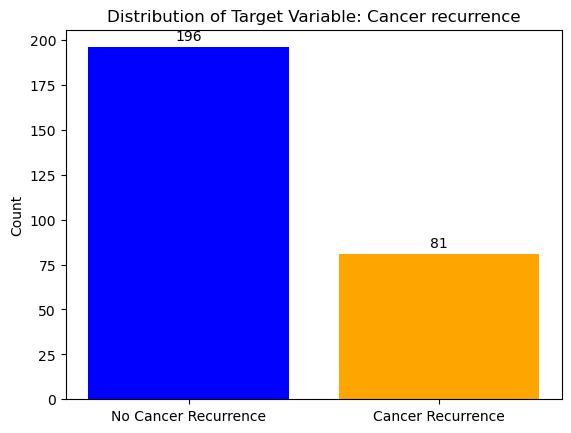

In [4]:
# Display summary statistics
# print(df.describe(include='all'))

# # Check for missing values
# print(df.isnull().sum())

# print('Target variable')
# Visualize the distribution of the target variable using plt
target_counts = df['cancer_recurrence'].value_counts()
plt.bar(target_counts.index, target_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Target Variable: Cancer recurrence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Cancer Recurrence', 'Cancer Recurrence'])

# Add text annotations to show the exact counts
for i, count in enumerate(target_counts.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom')

plt.show()


Age

age_patient
1     1
2    36
3    89
4    91
5    55
6     5
Name: count, dtype: int64
cancer_recurrence   0   1
age_patient              
0                   0   0
1                   1   0
2                  21  15
3                  62  27
4                  69  22
5                  38  17
6                   5   0
7                   0   0
8                   0   0


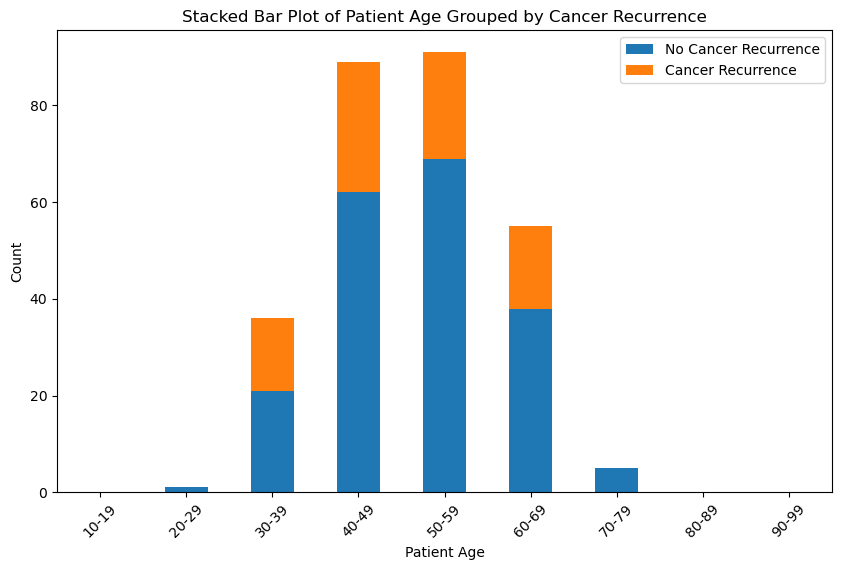

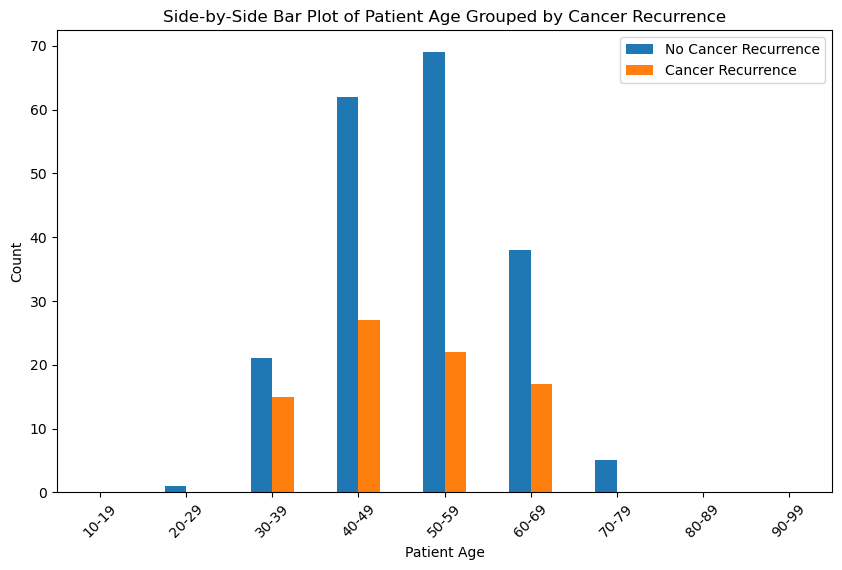

3.6989795918367347 1.0006146724180558
3.506172839506173 1.0261999901350063


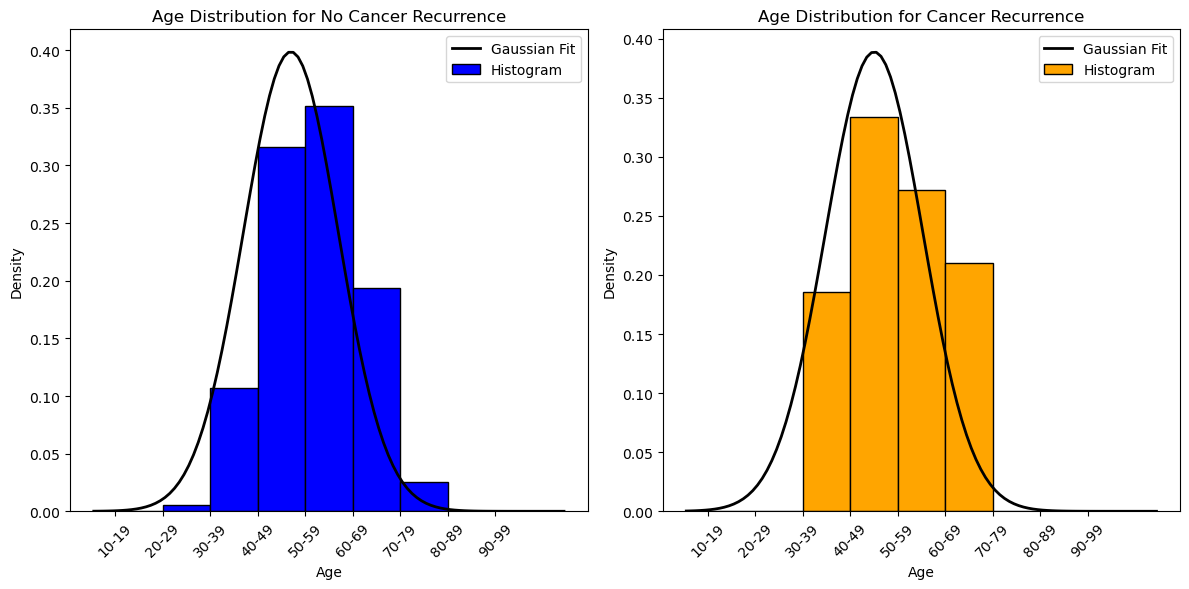

In [12]:
from scipy.stats import norm
import numpy as np

age_counts = df['age_patient'].value_counts().sort_index()
print(age_counts)

# Define the mapping for age ranges
age_range_mapping = {
    0: '10-19', 1: '20-29', 2: '30-39', 3: '40-49',
    4: '50-59', 5: '60-69', 6: '70-79', 7: '80-89', 8: '90-99'
}

# Create a crosstab of patient_age and cancer_recurrence
age_recurrence_crosstab = pd.crosstab(df['age_patient'], df['cancer_recurrence'], dropna=False)

# Ensure all age ranges are included in the crosstab
for age in age_range_mapping.keys():
    if age not in age_recurrence_crosstab.index:
        age_recurrence_crosstab.loc[age] = [0, 0]

# Sort the crosstab by patient_age
age_recurrence_crosstab = age_recurrence_crosstab.sort_index()

print(age_recurrence_crosstab)

# Plot the stacked bar chart
age_recurrence_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Patient Age Grouped by Cancer Recurrence')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.xticks(ticks=range(len(age_range_mapping)), labels=age_range_mapping.values(), rotation=45)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Plot the side-by-side bar chart
age_recurrence_crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add titles and labels
plt.title('Side-by-Side Bar Plot of Patient Age Grouped by Cancer Recurrence')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.xticks(ticks=range(len(age_range_mapping)), labels=age_range_mapping.values(), rotation=45)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# # Create a pie chart for no cancer recurrence by age
# no_recurrence_age_counts = df[df['cancer_recurrence'] == 0]['age_patient'].value_counts().sort_index()
# plt.figure(figsize=(8, 6))
# plt.pie(no_recurrence_age_counts, labels=[age_range_mapping[age] for age in no_recurrence_age_counts.index], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
# plt.title('Age Distribution for No Cancer Recurrence')
# plt.show()

# # Create a pie chart for cancer recurrence by age
# recurrence_age_counts = df[df['cancer_recurrence'] == 1]['age_patient'].value_counts().sort_index()
# plt.figure(figsize=(8, 6))
# plt.pie(recurrence_age_counts, labels=[age_range_mapping[age] for age in recurrence_age_counts.index], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
# plt.title('Age Distribution for Cancer Recurrence')
# plt.show()

# Plot the histogram for no cancer recurrence
plt.figure(figsize=(12, 6))

# No cancer recurrence
plt.subplot(1, 2, 1)
no_recurrence_ages = df[df['cancer_recurrence'] == 0]['age_patient']
mean_no_recurrence = no_recurrence_ages.mean()
std_no_recurrence = no_recurrence_ages.std()
print(mean_no_recurrence, std_no_recurrence)
plt.hist(no_recurrence_ages, bins=range(10), alpha=1, color='blue', density=True, edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_no_recurrence, std_no_recurrence)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Age Distribution for No Cancer Recurrence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(ticks=range(len(age_range_mapping)), labels=age_range_mapping.values(), rotation=45)
plt.legend(['Gaussian Fit', 'Histogram'])

# Cancer recurrence
plt.subplot(1, 2, 2)
recurrence_ages = df[df['cancer_recurrence'] == 1]['age_patient']
mean_recurrence = recurrence_ages.mean()
std_recurrence = recurrence_ages.std()
print(mean_recurrence, std_recurrence)
plt.hist(recurrence_ages, bins=range(10), alpha=1, color='orange', density=True, edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_recurrence, std_recurrence)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Age Distribution for Cancer Recurrence')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(ticks=range(len(age_range_mapping)), labels=age_range_mapping.values(), rotation=45)
plt.legend(['Gaussian Fit', 'Histogram'])

plt.tight_layout()
plt.show()

Menopause

cancer_recurrence,0,1
post_menopause,,
0,101,48
1,95,33


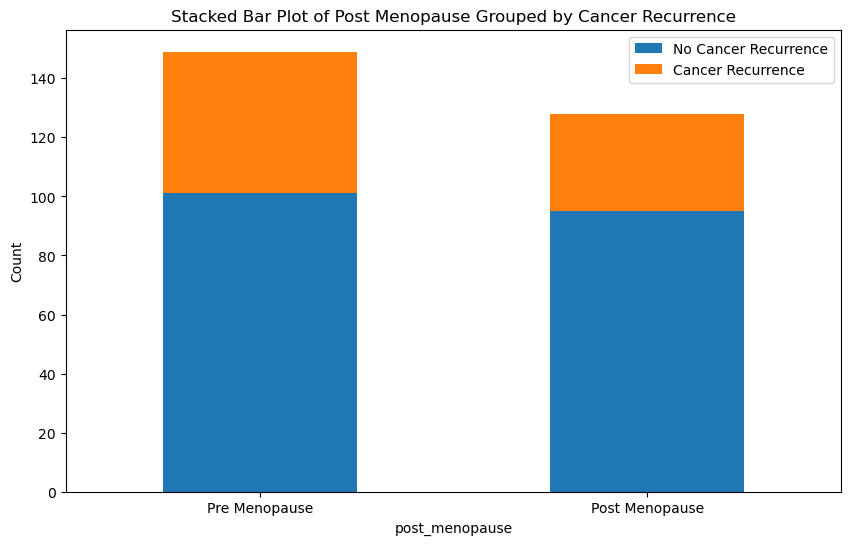

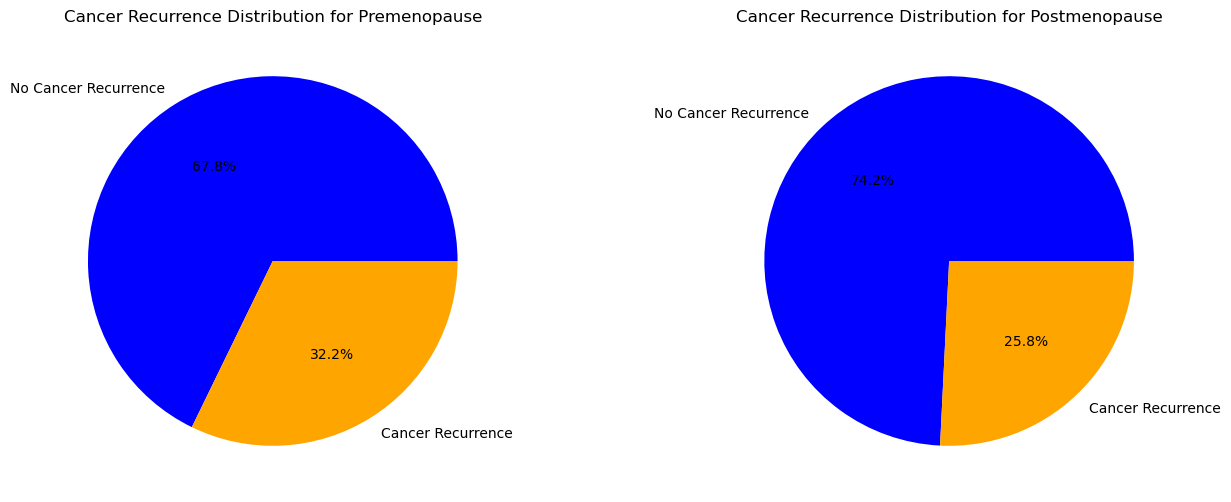

In [14]:
# Create a crosstab of post_menopause and cancer_recurrence
post_menopause_crosstab = pd.crosstab(df['post_menopause'], df['cancer_recurrence'], dropna=False)

# Ensure all post_menopause categories are included in the crosstab
for post_menopause in [0, 1]:
    if post_menopause not in post_menopause_crosstab.index:
        post_menopause_crosstab.loc[post_menopause] = [0, 0]

# Sort the crosstab by post_menopause
post_menopause_crosstab = post_menopause_crosstab.sort_index()

display(post_menopause_crosstab)

# Plot the stacked bar chart
post_menopause_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Post Menopause Grouped by Cancer Recurrence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Pre Menopause', 'Post Menopause'], rotation=0)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()
# Plot the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Create a pie chart for pre menopause
pre_menopause_counts = df[df['post_menopause'] == 0]['cancer_recurrence'].value_counts()
axs[0].pie(pre_menopause_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[0].set_title('Cancer Recurrence Distribution for Premenopause')

# Create a pie chart for post menopause
post_menopause_counts = df[df['post_menopause'] == 1]['cancer_recurrence'].value_counts()
axs[1].pie(post_menopause_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[1].set_title('Cancer Recurrence Distribution for Postmenopause')

plt.show()

tumor size 

cancer_recurrence,0,1
tumor_size,,
0-4,7,1
5-9,4,0
10-14,27,1
15-19,23,6
20-24,34,14
25-29,33,18
30-34,33,24
35-39,12,7
40-44,16,6


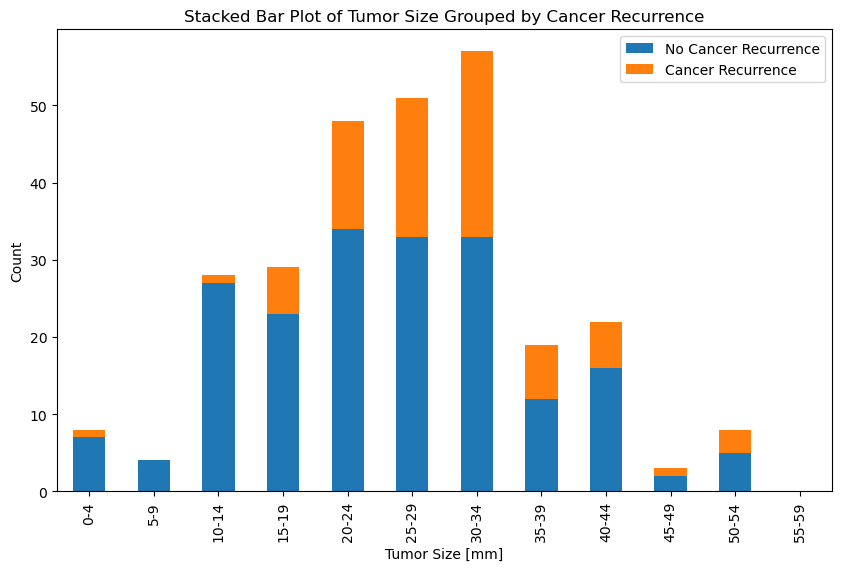

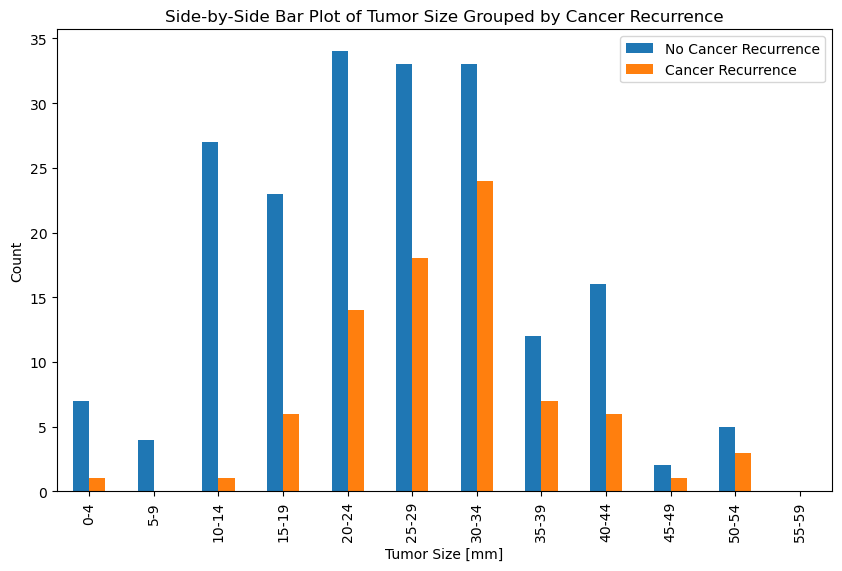

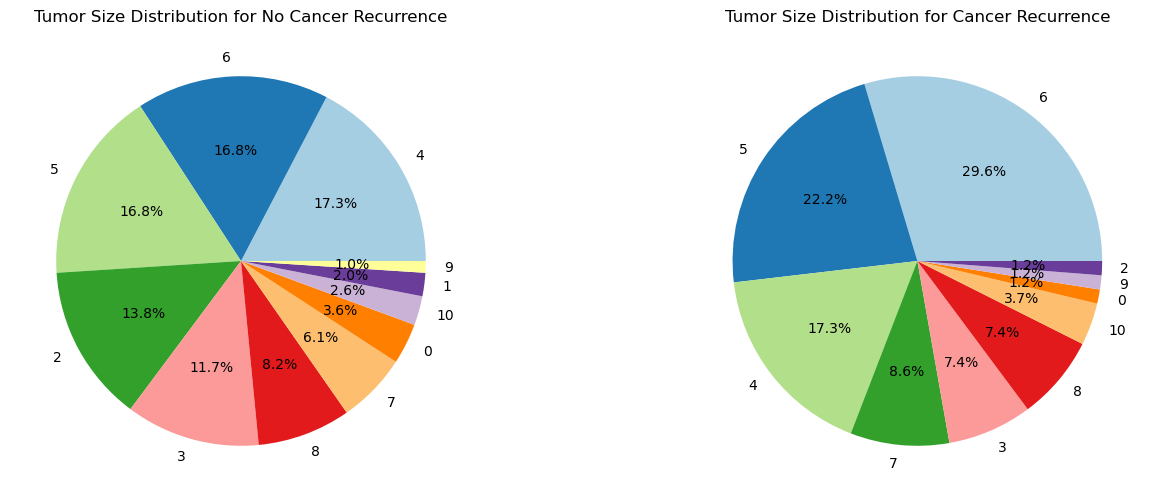

In [15]:
# Define the mapping for tumor size ranges
tumor_size_range_mapping = {
    0: '0-4', 1: '5-9', 2: '10-14', 3: '15-19', 4: '20-24', 5: '25-29',
    6: '30-34', 7: '35-39', 8: '40-44', 9: '45-49', 10: '50-54', 11: '55-59'
}

# Create a crosstab of tumor_size and cancer_recurrence
tumor_size_crosstab = pd.crosstab(df['tumor_size'], df['cancer_recurrence'], dropna=False)

# Ensure all tumor_size categories are included in the crosstab
for size in tumor_size_range_mapping.keys():
    if size not in tumor_size_crosstab.index:
        tumor_size_crosstab.loc[size] = [0, 0]

# Sort the crosstab by tumor_size
tumor_size_crosstab = tumor_size_crosstab.sort_index()

# Apply the mapping to the xlabels of the different bars
tumor_size_crosstab.index = tumor_size_crosstab.index.map(tumor_size_range_mapping)

display(tumor_size_crosstab)

# Plot the stacked bar chart
tumor_size_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Tumor Size Grouped by Cancer Recurrence')
plt.xlabel('Tumor Size [mm]')
plt.ylabel('Count')
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Plot the side-by-side bar chart
tumor_size_crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add titles and labels
plt.title('Side-by-Side Bar Plot of Tumor Size Grouped by Cancer Recurrence')
plt.xlabel('Tumor Size [mm]')
plt.ylabel('Count')
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Plot the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Create a pie chart for no cancer recurrence
no_recurrence_counts = df[df['cancer_recurrence'] == 0]['tumor_size'].value_counts()
axs[0].pie(no_recurrence_counts, labels=no_recurrence_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[0].set_title('Tumor Size Distribution for No Cancer Recurrence')

# Create a pie chart for cancer recurrence
recurrence_counts = df[df['cancer_recurrence'] == 1]['tumor_size'].value_counts()
axs[1].pie(recurrence_counts, labels=recurrence_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1].set_title('Tumor Size Distribution for Cancer Recurrence')

plt.show()

Radiotherapy 

cancer_recurrence,0,1
radiotherapy,,
0,164,51
1,32,30


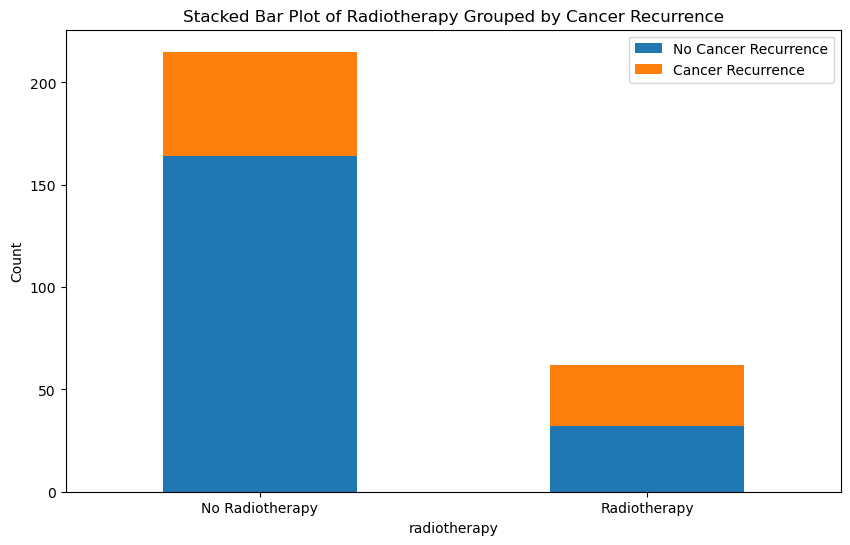

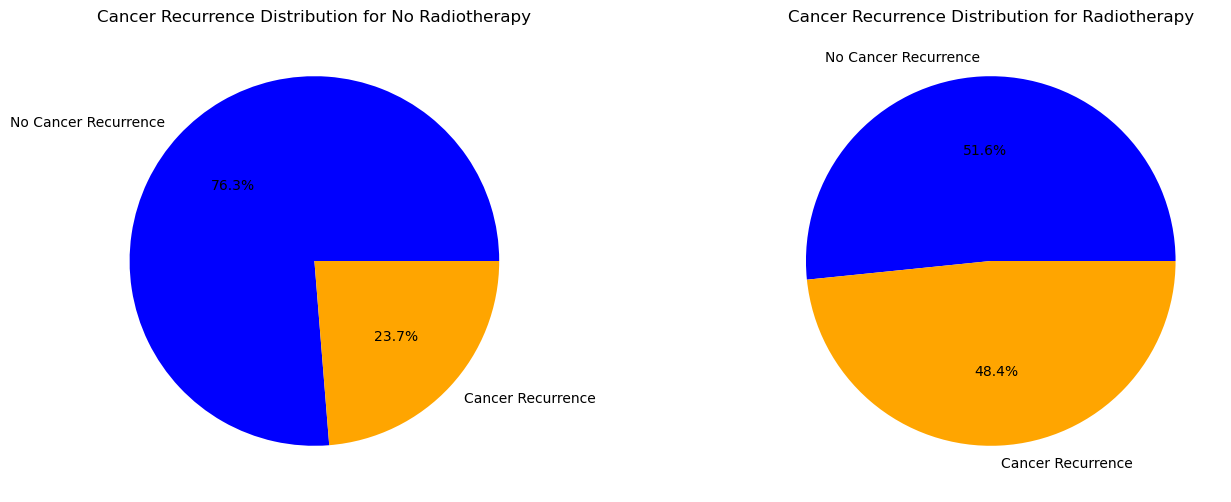

In [16]:
# Create a crosstab of radiotherapy and cancer_recurrence
radiotherapy_crosstab = pd.crosstab(df['radiotherapy'], df['cancer_recurrence'], dropna=False)

# Ensure all radiotherapy categories are included in the crosstab
for radiotherapy in [0, 1]:
    if radiotherapy not in radiotherapy_crosstab.index:
        radiotherapy_crosstab.loc[radiotherapy] = [0, 0]

# Sort the crosstab by radiotherapy
radiotherapy_crosstab = radiotherapy_crosstab.sort_index()

display(radiotherapy_crosstab)

# Plot the stacked bar chart
radiotherapy_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Radiotherapy Grouped by Cancer Recurrence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Radiotherapy', 'Radiotherapy'], rotation=0)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Plot the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Create a pie chart for no radiotherapy
no_radiotherapy_counts = df[df['radiotherapy'] == 0]['cancer_recurrence'].value_counts()
axs[0].pie(no_radiotherapy_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[0].set_title('Cancer Recurrence Distribution for No Radiotherapy')

# Create a pie chart for radiotherapy
radiotherapy_counts = df[df['radiotherapy'] == 1]['cancer_recurrence'].value_counts()
axs[1].pie(radiotherapy_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[1].set_title('Cancer Recurrence Distribution for Radiotherapy')

plt.show()

Left or right breast 

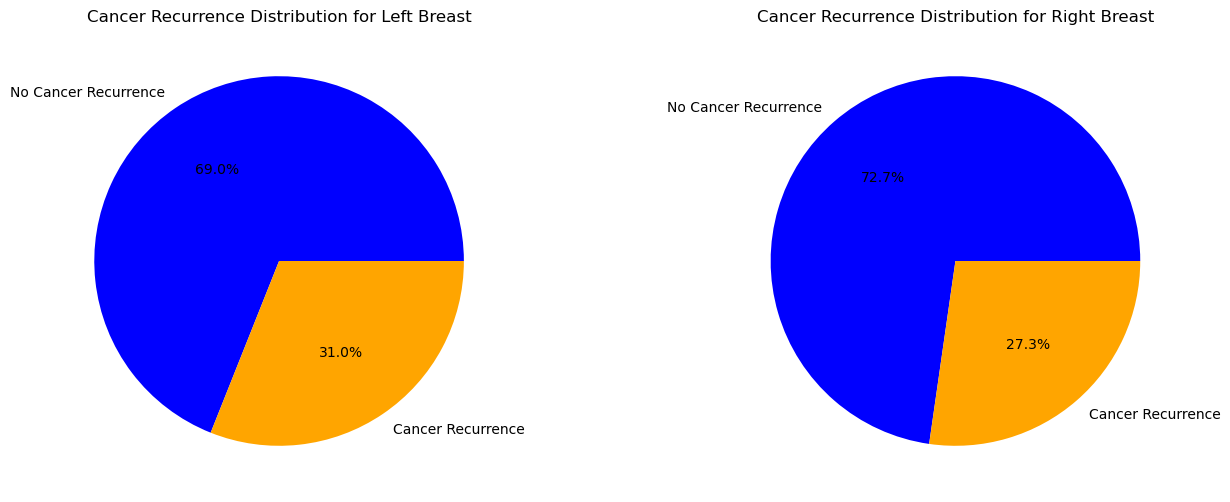

In [17]:
# Create a pie chart for left breast
left_breast_counts = df[df['left_breast'] == 1]['cancer_recurrence'].value_counts()

# Create a pie chart for right breast
right_breast_counts = df[df['left_breast'] == 0]['cancer_recurrence'].value_counts()

# Plot the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Left breast pie chart
axs[0].pie(left_breast_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[0].set_title('Cancer Recurrence Distribution for Left Breast')

# Right breast pie chart
axs[1].pie(right_breast_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[1].set_title('Cancer Recurrence Distribution for Right Breast')

plt.show()

Cancer infiltrated in LN capsules

cancer_recurrence,0,1
cancer_LN_capsule,,
0,171,50
1,25,31


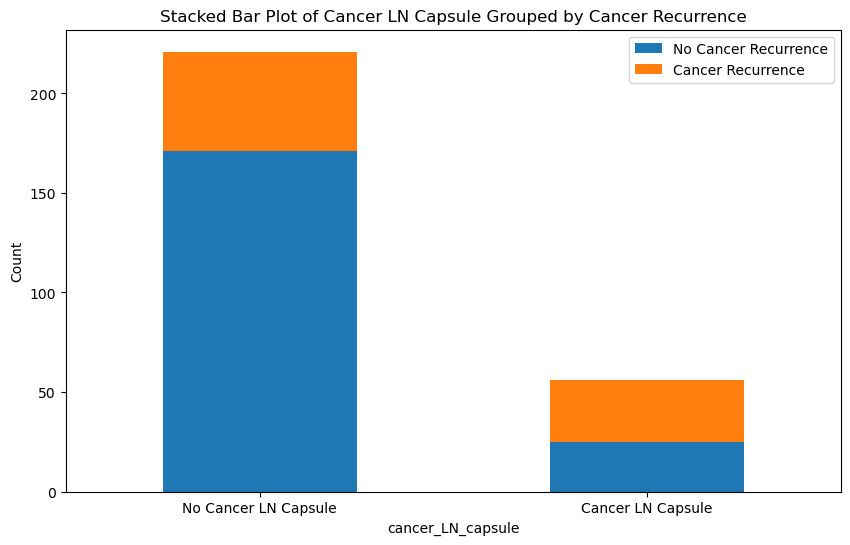

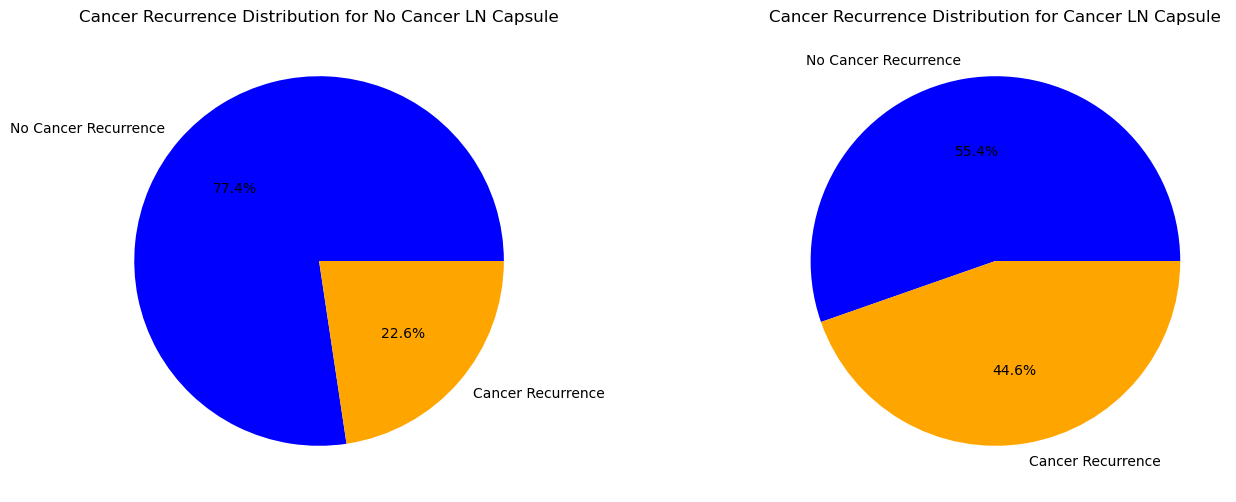

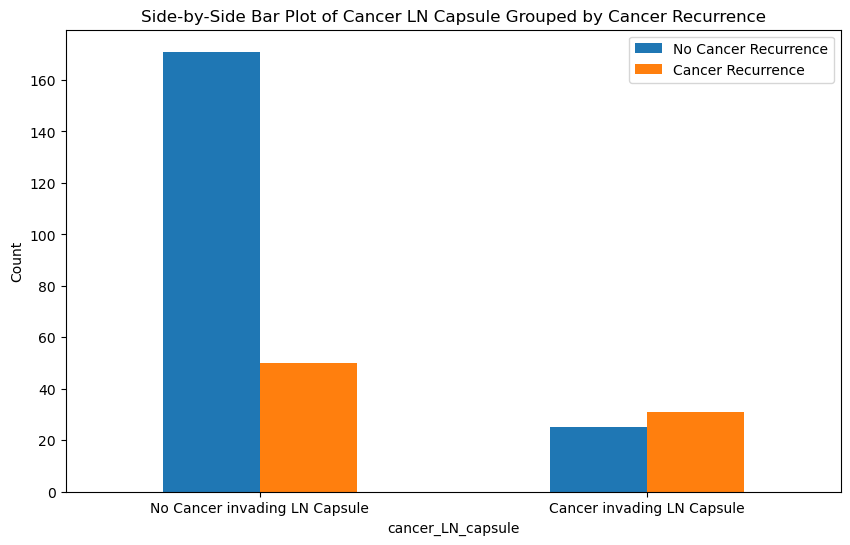

In [18]:
# Create a crosstab of cancer_LN_capsule and cancer_recurrence
cancer_LN_capsule_crosstab = pd.crosstab(df['cancer_LN_capsule'], df['cancer_recurrence'], dropna=False)

# Ensure all cancer_LN_capsule categories are included in the crosstab
for capsule in [0, 1]:
    if capsule not in cancer_LN_capsule_crosstab.index:
        cancer_LN_capsule_crosstab.loc[capsule] = [0, 0]

# Sort the crosstab by cancer_LN_capsule
cancer_LN_capsule_crosstab = cancer_LN_capsule_crosstab.sort_index()

display(cancer_LN_capsule_crosstab)

# Plot the stacked bar chart
cancer_LN_capsule_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Cancer LN Capsule Grouped by Cancer Recurrence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Cancer LN Capsule', 'Cancer LN Capsule'], rotation=0)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Plot the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Create a pie chart for no cancer LN capsule
no_capsule_counts = df[df['cancer_LN_capsule'] == 0]['cancer_recurrence'].value_counts()
axs[0].pie(no_capsule_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[0].set_title('Cancer Recurrence Distribution for No Cancer LN Capsule')

# Create a pie chart for cancer LN capsule
capsule_counts = df[df['cancer_LN_capsule'] == 1]['cancer_recurrence'].value_counts()
axs[1].pie(capsule_counts, labels=['No Cancer Recurrence', 'Cancer Recurrence'], autopct='%1.1f%%', colors=['blue', 'orange'])
axs[1].set_title('Cancer Recurrence Distribution for Cancer LN Capsule')

plt.show()

# Plot the side-by-side bar chart
cancer_LN_capsule_crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add titles and labels
plt.title('Side-by-Side Bar Plot of Cancer LN Capsule Grouped by Cancer Recurrence')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Cancer invading LN Capsule', 'Cancer invading LN Capsule'], rotation=0)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

Tumor grade

cancer_recurrence,0,1
tumor_grade,,
1,57,9
2,101,28
3,38,44


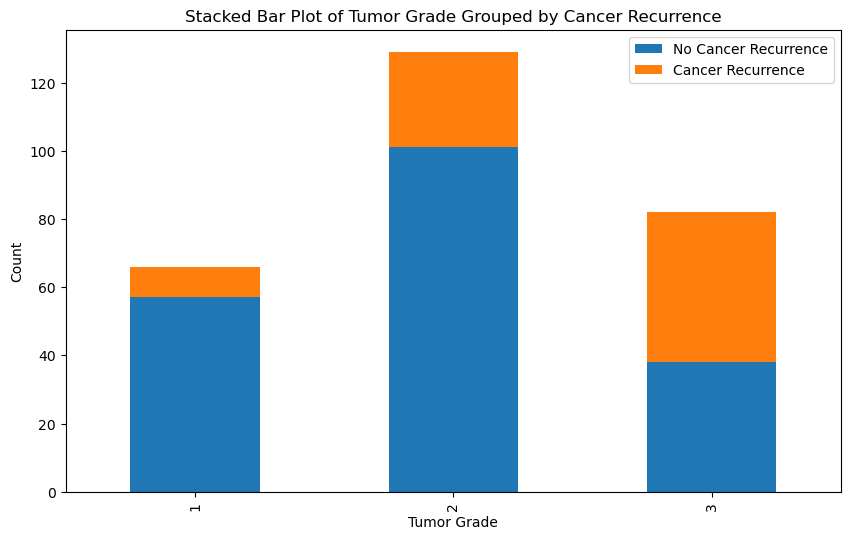

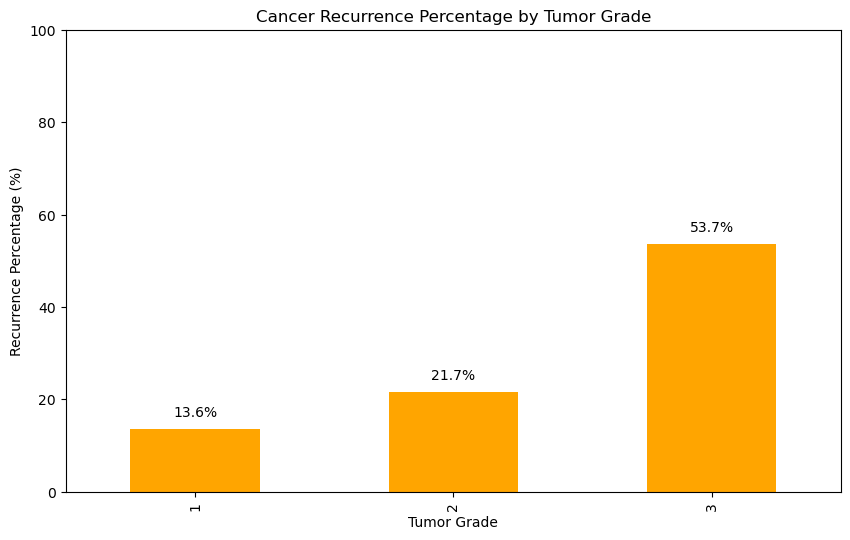

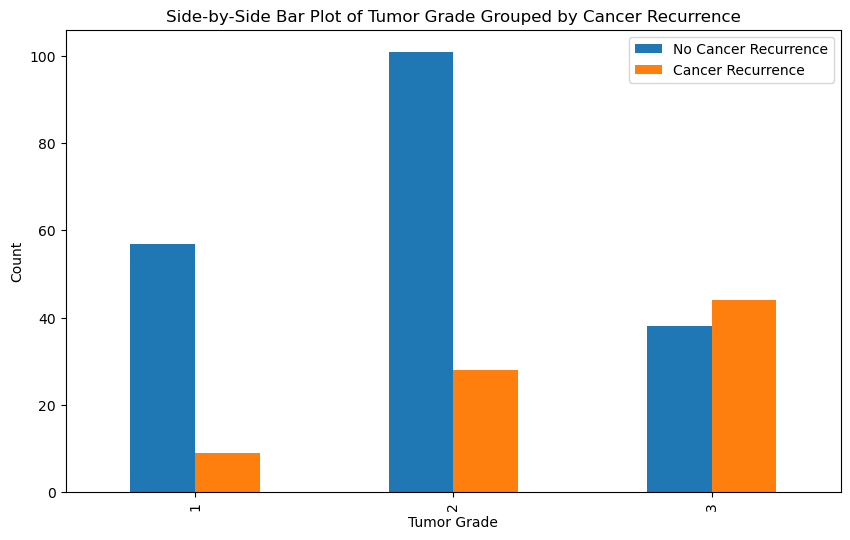

In [19]:
# Create a crosstab of tumor_grade and cancer_recurrence
tumor_grade_crosstab = pd.crosstab(df['tumor_grade'], df['cancer_recurrence'], dropna=False)

# Ensure all tumor_grade categories are included in the crosstab
for grade in sorted(df['tumor_grade'].unique()):
    if grade not in tumor_grade_crosstab.index:
        tumor_grade_crosstab.loc[grade] = [0, 0]

# Sort the crosstab by tumor_grade
tumor_grade_crosstab = tumor_grade_crosstab.sort_index()

display(tumor_grade_crosstab)

# Plot the stacked bar chart
tumor_grade_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Tumor Grade Grouped by Cancer Recurrence')
plt.xlabel('Tumor Grade')
plt.ylabel('Count')
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Calculate the percentage of cancer recurrence for each tumor grade
tumor_grade_crosstab['recurrence_percentage'] = (tumor_grade_crosstab[1] / (tumor_grade_crosstab[0] + tumor_grade_crosstab[1])) * 100

# Plot the recurrence percentage
ax = tumor_grade_crosstab['recurrence_percentage'].plot(kind='bar', figsize=(10, 6), color='orange')

# Add titles and labels
plt.title('Cancer Recurrence Percentage by Tumor Grade')
plt.xlabel('Tumor Grade')
plt.ylabel('Recurrence Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%

# Add text annotations to show the exact percentages
for i, percentage in enumerate(tumor_grade_crosstab['recurrence_percentage']):
    ax.text(i, percentage + 2, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

# Plot the side-by-side bar chart
tumor_grade_crosstab.drop(columns='recurrence_percentage').plot(kind='bar', stacked=False, figsize=(10, 6))

# Add titles and labels
plt.title('Side-by-Side Bar Plot of Tumor Grade Grouped by Cancer Recurrence')
plt.xlabel('Tumor Grade')
plt.ylabel('Count')
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()



Amount of LN exposed to cancer

cancer_recurrence,0,1
amount_cancer_LN,,
0,166,43
1,17,17
2,7,10
3,2,5
4,1,2
5,3,3
8,0,1


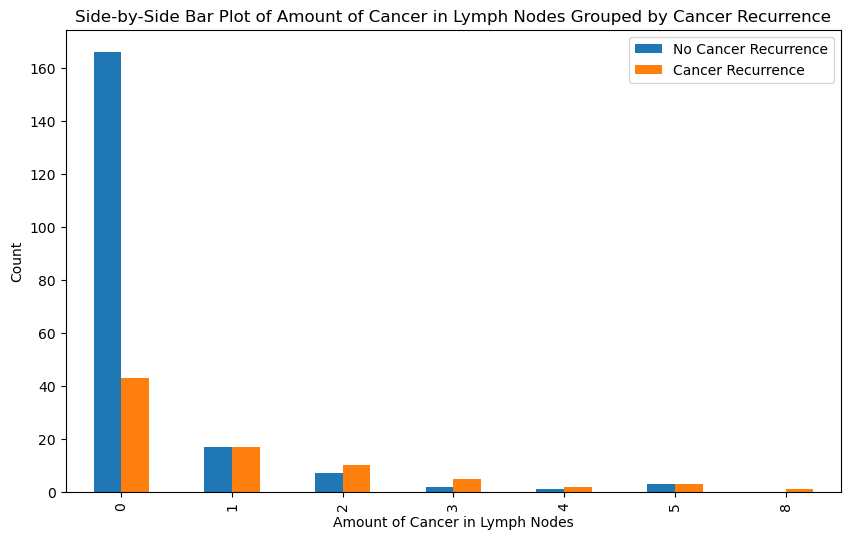

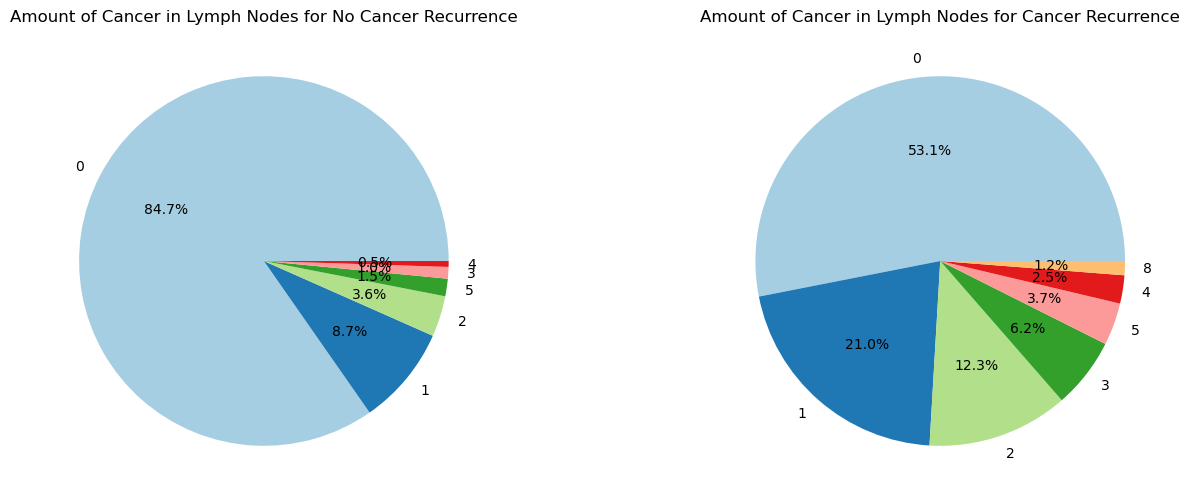

In [20]:
# Create a crosstab of amount_cancer_LN and cancer_recurrence
amount_cancer_LN_crosstab = pd.crosstab(df['amount_cancer_LN'], df['cancer_recurrence'], dropna=False)

# Ensure all amount_cancer_LN categories are included in the crosstab
for amount in sorted(df['amount_cancer_LN'].unique()):
    if amount not in amount_cancer_LN_crosstab.index:
        amount_cancer_LN_crosstab.loc[amount] = [0, 0]

# Sort the crosstab by amount_cancer_LN
amount_cancer_LN_crosstab = amount_cancer_LN_crosstab.sort_index()

display(amount_cancer_LN_crosstab)

# Plot the side-by-side bar chart
amount_cancer_LN_crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add titles and labels
plt.title('Side-by-Side Bar Plot of Amount of Cancer in Lymph Nodes Grouped by Cancer Recurrence')
plt.xlabel('Amount of Cancer in Lymph Nodes')
plt.ylabel('Count')
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

# Plot the pie charts side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Create a pie chart for no cancer recurrence
no_recurrence_counts = df[df['cancer_recurrence'] == 0]['amount_cancer_LN'].value_counts()
axs[0].pie(no_recurrence_counts, labels=no_recurrence_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[0].set_title('Amount of Cancer in Lymph Nodes for No Cancer Recurrence')

# Create a pie chart for cancer recurrence
recurrence_counts = df[df['cancer_recurrence'] == 1]['amount_cancer_LN'].value_counts()
axs[1].pie(recurrence_counts, labels=recurrence_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1].set_title('Amount of Cancer in Lymph Nodes for Cancer Recurrence')

plt.show()

Location of affected breast 

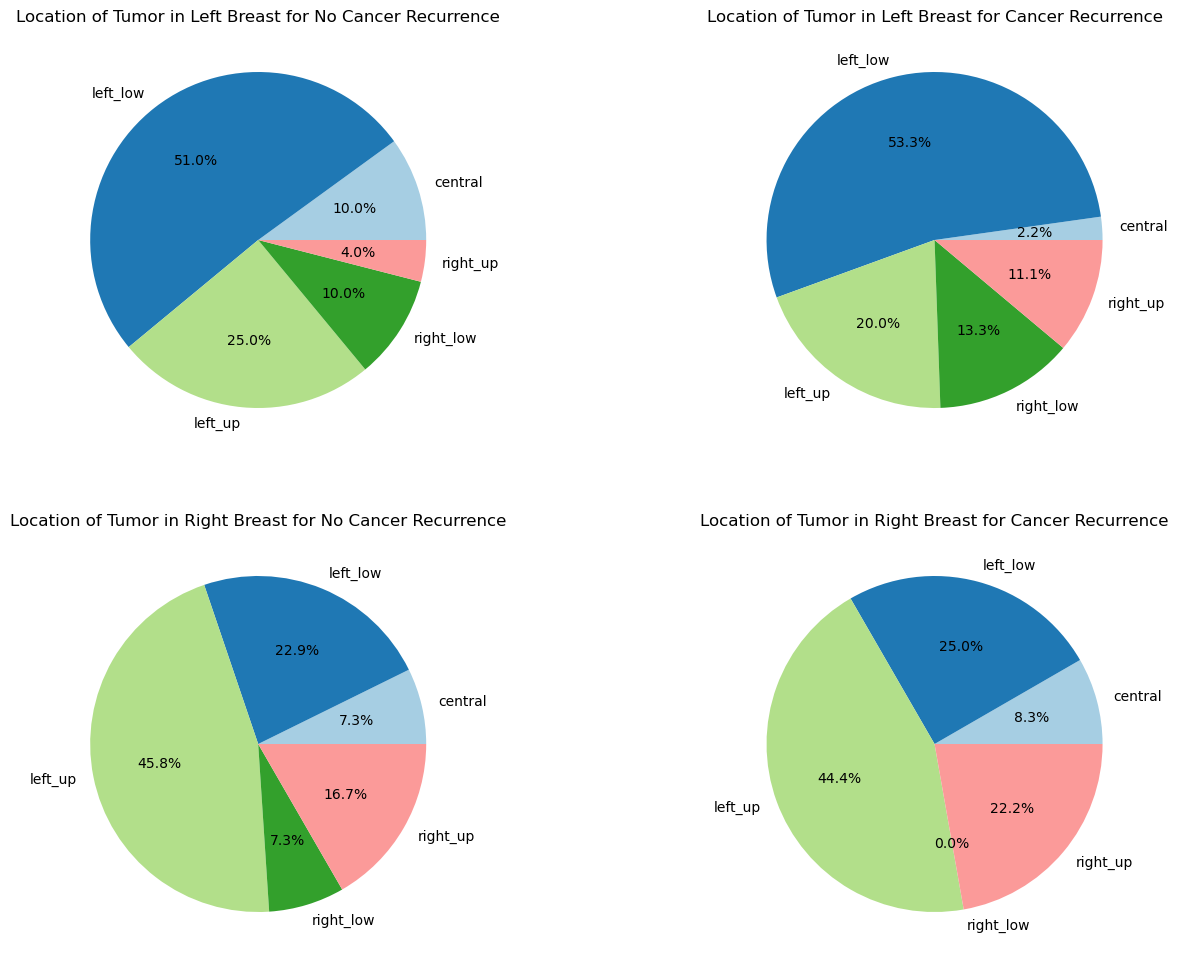

In [22]:
# Filter the columns that start with 'affected_'
affected_columns = [col for col in df.columns if col.startswith('affected_')]

# Separate the data by cancer recurrence and breast side
no_recurrence_left = df[(df['cancer_recurrence'] == 0) & (df['left_breast'] == 1)][affected_columns].sum()
recurrence_left = df[(df['cancer_recurrence'] == 1) & (df['left_breast'] == 1)][affected_columns].sum()
no_recurrence_right = df[(df['cancer_recurrence'] == 0) & (df['left_breast'] == 0)][affected_columns].sum()
recurrence_right = df[(df['cancer_recurrence'] == 1) & (df['left_breast'] == 0)][affected_columns].sum()

# Plot the pie charts side by side
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot the pie chart for no cancer recurrence in the left breast
axs[0, 0].pie(no_recurrence_left, labels=no_recurrence_left.index.str.replace('affected_', ''), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[0, 0].set_title('Location of Tumor in Left Breast for No Cancer Recurrence')

# Plot the pie chart for cancer recurrence in the left breast
axs[0, 1].pie(recurrence_left, labels=recurrence_left.index.str.replace('affected_', ''), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[0, 1].set_title('Location of Tumor in Left Breast for Cancer Recurrence')

# Plot the pie chart for no cancer recurrence in the right breast
axs[1, 0].pie(no_recurrence_right, labels=no_recurrence_right.index.str.replace('affected_', ''), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1, 0].set_title('Location of Tumor in Right Breast for No Cancer Recurrence')

# Plot the pie chart for cancer recurrence in the right breast
axs[1, 1].pie(recurrence_right, labels=recurrence_right.index.str.replace('affected_', ''), autopct='%1.1f%%', colors=plt.cm.Paired.colors)
axs[1, 1].set_title('Location of Tumor in Right Breast for Cancer Recurrence')

plt.show()



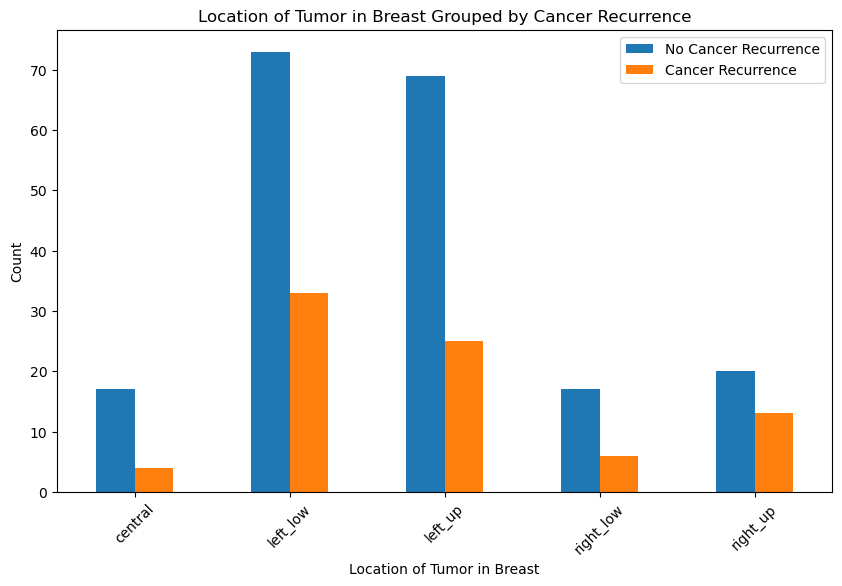

In [ ]:
# Separate the data by cancer recurrence
no_recurrence_data = df[df['cancer_recurrence'] == 0][affected_columns].sum()
recurrence_data = df[df['cancer_recurrence'] == 1][affected_columns].sum()

# Create a side-by-side bar chart for the location of tumor in breast
location_crosstab = pd.DataFrame({
    'No Cancer Recurrence': no_recurrence_data,
    'Cancer Recurrence': recurrence_data
})

location_crosstab.plot(kind='bar', figsize=(10, 6))

# Add titles and labels
plt.title('Location of Tumor in Breast Grouped by Cancer Recurrence')
plt.xlabel('Location of Tumor in Breast')
plt.ylabel('Count')
plt.xticks(ticks=range(len(no_recurrence_data.index)), labels=no_recurrence_data.index.str.replace('affected_', ''), rotation=45)
plt.legend(['No Cancer Recurrence', 'Cancer Recurrence'])
plt.show()

Correlation with target variable

                    radiotherapy  left_breast  cancer_LN_capsule  \
radiotherapy            1.000000    -0.025230           0.333537   
left_breast            -0.025230     1.000000           0.012345   
cancer_LN_capsule       0.333537     0.012345           1.000000   
post_menopause         -0.080780     0.057940          -0.033847   
tumor_grade             0.230821     0.045874           0.330181   
amount_cancer_LN        0.296590     0.014246           0.616589   
tumor_size              0.168402    -0.050005           0.205537   
age_patient            -0.075946     0.041744          -0.044446   
affected_central       -0.088360     0.000197          -0.042296   
affected_left_low       0.022710     0.290184          -0.007945   
affected_left_up        0.035859    -0.232128          -0.019053   
affected_right_low      0.026743     0.103742           0.011408   
affected_right_up      -0.037065    -0.184626           0.064613   
cancer_recurrence       0.226020     0.041304   

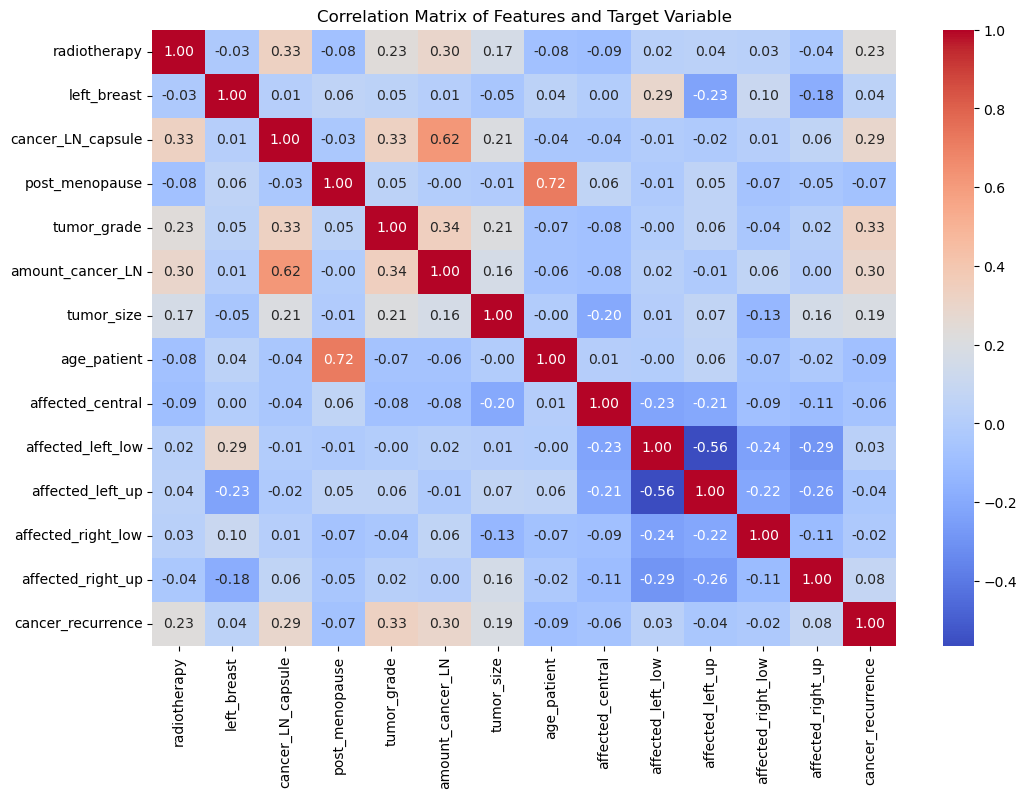

In [53]:
# Combine the features and the target variable into a single DataFrame
combined_df = pd.concat([X_imported, Y_imported], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

cancer_recurrence     1.000000
tumor_grade           0.330253
amount_cancer_LN      0.295989
cancer_LN_capsule     0.289002
radiotherapy          0.226020
tumor_size            0.188848
affected_right_up     0.082078
left_breast           0.041304
affected_left_low     0.032717
affected_right_low   -0.020871
affected_left_up     -0.041693
affected_central     -0.064188
post_menopause       -0.070514
age_patient          -0.086981
Name: cancer_recurrence, dtype: float64


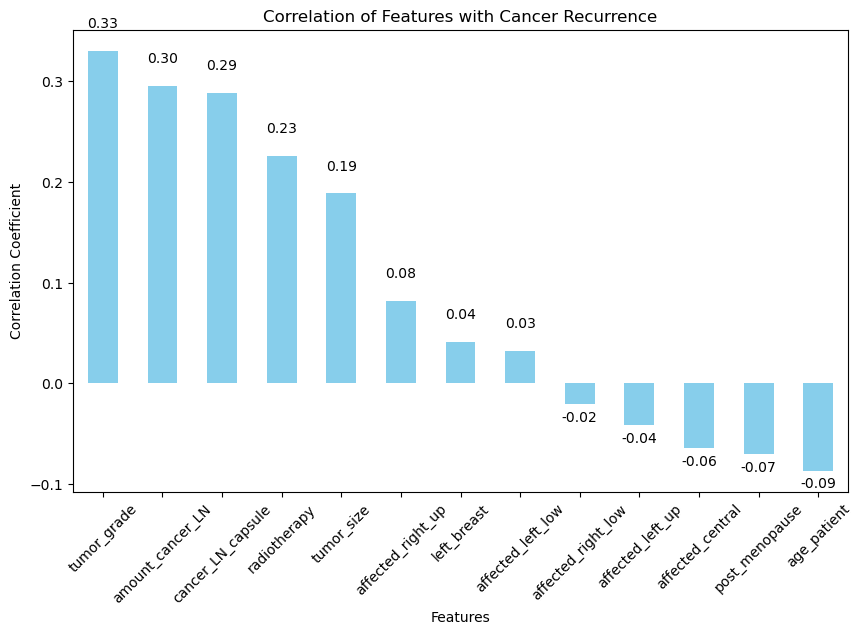

In [29]:
# Combine the features and the target variable into a single DataFrame
combined_df = pd.concat([X_imported, Y_imported], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Extract the correlation of all attributes with the outcome variable
correlation_with_target = correlation_matrix['cancer_recurrence'].sort_values(ascending=False)

# Display the correlation with the target variable
print(correlation_with_target)

# Visualize the correlation with the target variable using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_target.drop('cancer_recurrence').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Cancer Recurrence')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)

# Add text annotations to show the absolute values of the correlation coefficients
for i, value in enumerate(correlation_with_target.drop('cancer_recurrence')):
    plt.text(i, value + 0.02 if value > 0 else value - 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.show()


c:\Users\pc\Anaconda3\envs\ENV_MLLB\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


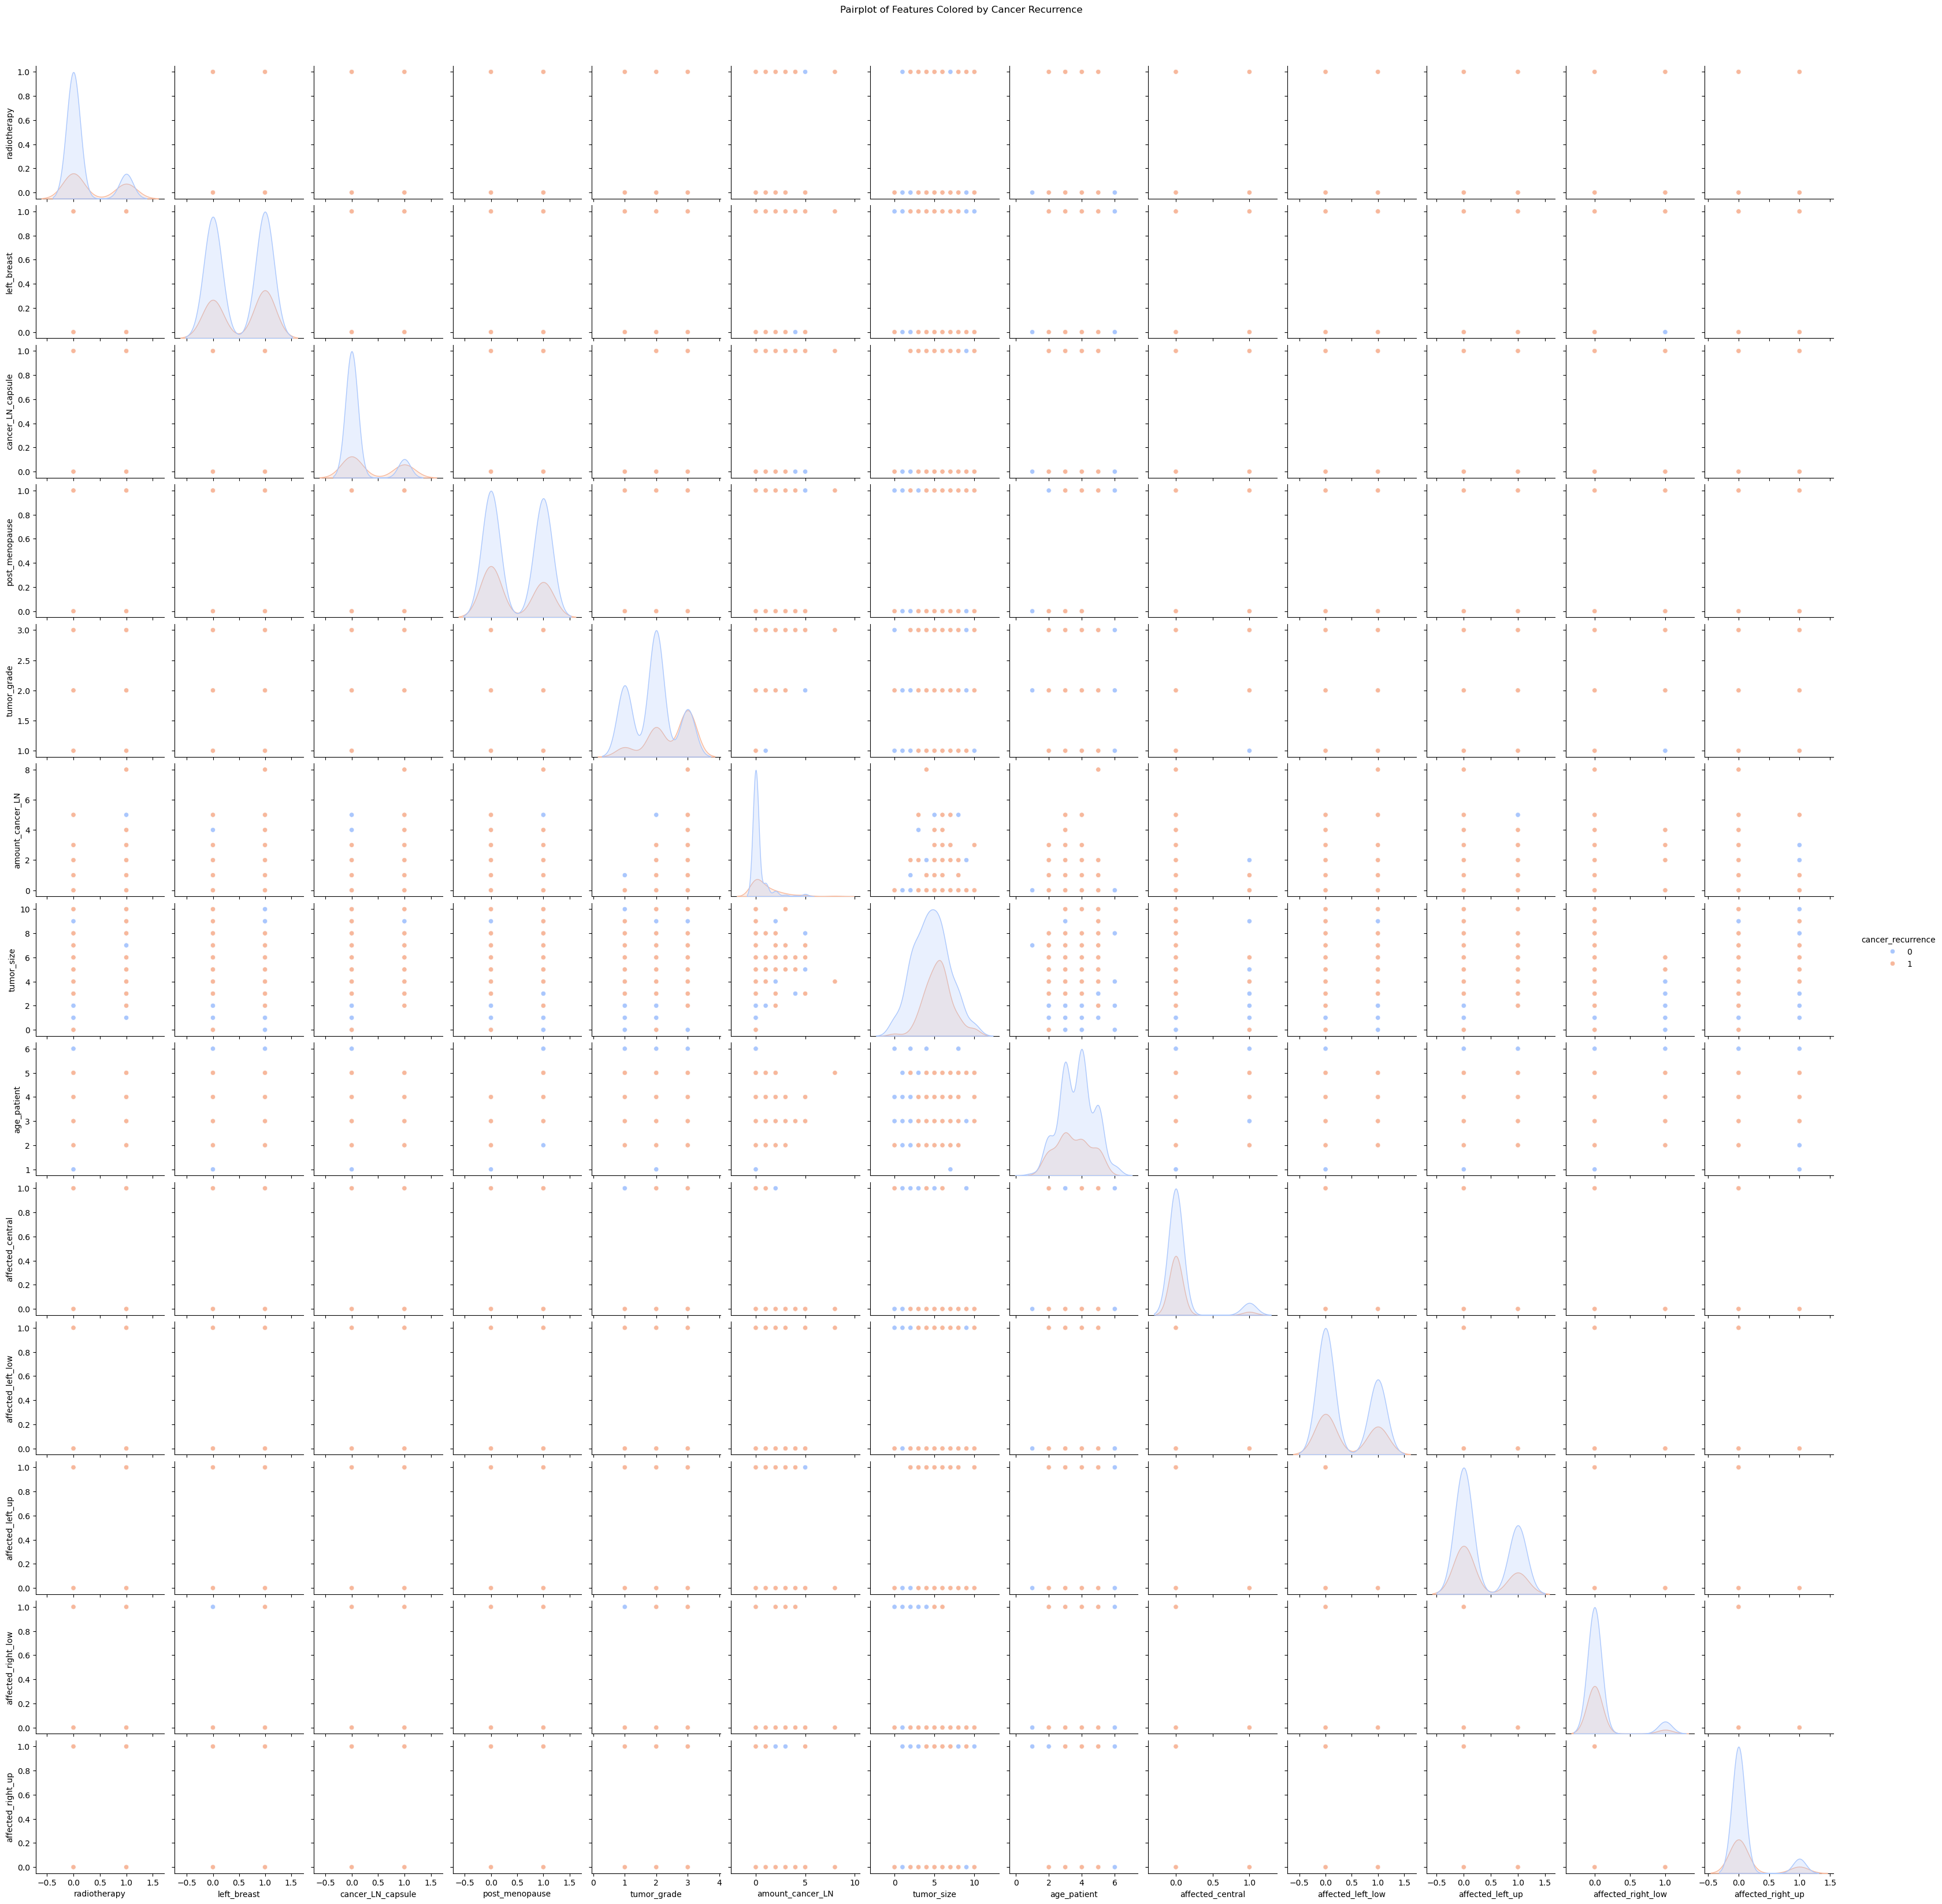

In [55]:
# Combine the features and the target variable into a single DataFrame
combined_df = pd.concat([X_imported, Y_imported], axis=1)

# Plot the pairplot
sns.pairplot(combined_df, hue='cancer_recurrence', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Features Colored by Cancer Recurrence', y=1.02)
plt.show()